In [1]:
!pip install  pandas numpy matplotlib seaborn  Scikit-learn geopy

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------  122.9/125.4 kB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ------------------------------ --------- 30.7/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 385.7 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import validation_curve

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [4]:
df= pd.read_csv(".\\clean_datasets\\real_estate.csv")

In [5]:
freq = df['state'].value_counts() / len(df)
df['state_encoded'] = df['state'].map(freq)

In [6]:
df.columns

Index(['Unnamed: 0', 'lotArea', 'loglotArea', 'livingArea', 'price_per_sq_m',
       'latitude', 'longitude', 'state', 'num_bedrooms.x', 'price',
       'num_bedrooms_categorical', 'num_full_baths_categorical', 'total_baths',
       'total_risk_score_norm', 'adjusted_price', 'state_encoded'],
      dtype='object')

In [7]:
df.state.unique ()

array(['WI', 'AK', 'TX', 'NJ', 'MO', 'TN', 'OR', 'DC', 'ID', 'AR', 'NV',
       'NC', 'NM', 'AZ', 'PA', 'CA', 'MI', 'GA', 'DE', 'KY', 'CO', 'MN',
       'MS', 'AL', 'OH', 'IN', 'LA', 'VA', 'KS', 'RI', 'OK', 'WV', 'MA',
       'NY', 'FL', 'IA', 'SC', 'SD', 'MD', 'CT', 'UT', 'NH', 'IL', 'VT',
       'NE', 'ME', 'WA', 'HI'], dtype=object)

In [8]:
state_mapping = {
    'WI': 'Wisconsin', 'AK': 'Alaska', 'TX': 'Texas', 'NJ': 'New Jersey',
    'MO': 'Missouri', 'TN': 'Tennessee', 'OR': 'Oregon', 'DC': 'District of Columbia',
    'ID': 'Idaho', 'AR': 'Arkansas', 'NV': 'Nevada', 'NC': 'North Carolina',
    'NM': 'New Mexico', 'AZ': 'Arizona', 'PA': 'Pennsylvania', 'CA': 'California',
    'MI': 'Michigan', 'GA': 'Georgia', 'DE': 'Delaware', 'KY': 'Kentucky',
    'CO': 'Colorado', 'MN': 'Minnesota', 'MS': 'Mississippi', 'AL': 'Alabama',
    'OH': 'Ohio', 'IN': 'Indiana', 'LA': 'Louisiana', 'VA': 'Virginia',
    'KS': 'Kansas', 'RI': 'Rhode Island', 'OK': 'Oklahoma', 'WV': 'West Virginia',
    'MA': 'Massachusetts', 'NY': 'New York', 'FL': 'Florida', 'IA': 'Iowa',
    'SC': 'South Carolina', 'SD': 'South Dakota', 'MD': 'Maryland',
    'CT': 'Connecticut', 'UT': 'Utah', 'NH': 'New Hampshire', 'IL': 'Illinois',
    'VT': 'Vermont', 'NE': 'Nebraska', 'ME': 'Maine', 'WA': 'Washington',
    'HI': 'Hawaii'
}
df['state'] = df['state'].map(state_mapping)


In [9]:
df


,Unnamed: 0,lotArea,loglotArea,livingArea,price_per_sq_m,latitude,longitude,state,num_bedrooms.x,price,num_bedrooms_categorical,num_full_baths_categorical,total_baths,total_risk_score_norm,adjusted_price,state_encoded
0,0,526,6.267201,124,400.000000,42.972787,-87.910514,Wisconsin,3,264500,medium,large,1,0.441044,2.439766e+05,0.009491
1,1,784,6.665684,251,400.000000,61.157360,-149.938266,Alaska,6,420000,large,Invalid,0,0.366559,3.957370e+05,0.006039
2,2,591,6.383507,234,400.000000,30.000977,-95.183170,Texas,4,338500,large,medium,3,0.575951,2.972723e+05,0.186209
3,3,567,6.342121,58,400.000000,40.049616,-74.127769,New Jersey,1,252500,large,medium,1,0.122497,2.504969e+05,0.019291
4,4,409,6.016157,91,400.000000,38.624208,-90.291091,Missouri,3,204500,medium,medium,1,0.653947,1.571304e+05,0.008961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132126,132126,87,4.477337,87,7724.137931,42.344967,-71.070588,Massachusetts,1,1348000,medium,medium,2,0.312038,1.285647e+06,0.025929
132127,132127,27,3.332205,27,7870.370370,42.358197,-71.062352,Massachusetts,0,426500,Invalid,medium,1,0.633360,3.334983e+05,0.025929
132128,132128,65,4.189655,46,8107.207207,38.913060,-77.021250,District of Columbia,1,903900,medium,medium,2,0.461107,8.183451e+05,0.011988
132129,132129,99,4.605170,99,8328.282828,42.352365,-71.082949,Massachusetts,2,1654000,large,large,2,0.635187,1.284213e+06,0.025929


In [10]:
df.total_risk_score_norm

0         0.441044
1         0.366559
2         0.575951
3         0.122497
4         0.653947
            ...   
132126    0.312038
132127    0.633360
132128    0.461107
132129    0.635187
132130    0.620820
Name: total_risk_score_norm, Length: 132131, dtype: float64

In [11]:
df['open_space_flag'] = df.apply(
    lambda row: 1 if (row['num_full_baths_categorical'] == 'Invalid') and (row['num_bedrooms_categorical'] == 'Invalid') else 0,
    axis=1
)
size_mapping = {'small': 1, 'medium': 2, 'large': 3, 'Invalid': 0}
df['size_bath_encoded'] = df['num_full_baths_categorical'].map(size_mapping)
df['size_bed_encoded'] = df['num_bedrooms_categorical'].map(size_mapping)
df = df.drop(['Unnamed: 0','price'], axis=1)


In [12]:
df.columns

Index(['lotArea', 'loglotArea', 'livingArea', 'price_per_sq_m', 'latitude',
       'longitude', 'state', 'num_bedrooms.x', 'num_bedrooms_categorical',
       'num_full_baths_categorical', 'total_baths', 'total_risk_score_norm',
       'adjusted_price', 'state_encoded', 'open_space_flag',
       'size_bath_encoded', 'size_bed_encoded'],
      dtype='object')

In [13]:
df.to_csv('./clean_datasets/real_estate_encoded.csv')

In [14]:
state_encoded = df.loc[df['state'] == 'Hawaii', 'state_encoded'].values[0]
state_encoded


np.float64(0.02029046930697565)


We have excluded the `open_space_flag` feature from the model as it demonstrated minimal impact on the target variable during the exploratory analysis. Additionally, we have decided not to include the `price_per_m_sq` feature, as it introduces a high risk of overfitting, potentially reducing the model's generalizability to unseen data.


In [15]:
y = df['adjusted_price']
x =  df[['lotArea','livingArea',  'num_bedrooms.x', 'total_baths', 'total_risk_score_norm', 'state_encoded',
       'size_bath_encoded', 'size_bed_encoded']]

In [16]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.5,random_state=42)

In [ ]:
model = RandomForestRegressor(n_jobs = -1)
model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
importances = model.feature_importances_
features = x.columns

feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Display the feature importance
print(feature_importance)

livingArea               0.330606
lotArea                  0.240159
state_encoded            0.170134
total_risk_score_norm    0.168923
total_baths              0.033639
num_bedrooms.x           0.026211
size_bath_encoded        0.015435
size_bed_encoded         0.014893
dtype: float64


In [ ]:
model.score(x_test,y_test)

0.6481683116545369

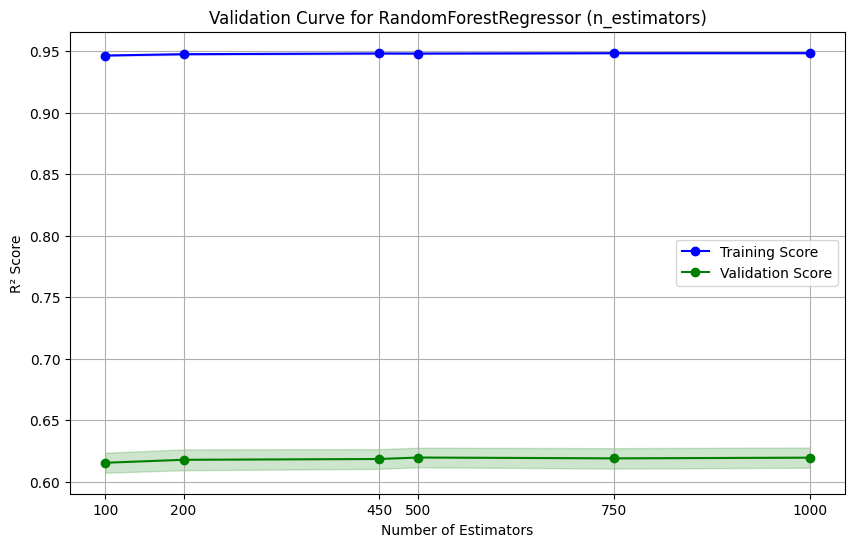

In [ ]:
# Provided arrays
train_scores = np.array([
    [0.94654615, 0.94600106, 0.94682066, 0.94671669, 0.94618997],
    [0.94724214, 0.9472551 , 0.94821023, 0.94790142, 0.94703866],
    [0.94805201, 0.94788979, 0.94870661, 0.94845964, 0.94751551],
    [0.9478483 , 0.94783708, 0.94865221, 0.94820436, 0.94778807],
    [0.94833642, 0.9480933 , 0.94856098, 0.94862525, 0.94813149],
    [0.94817575, 0.94811431, 0.94885445, 0.94872119, 0.94805914]
])

validation_scores = np.array([
    [0.6297782 , 0.61496415, 0.60475957, 0.61512781, 0.61260457],
    [0.6335347 , 0.61600151, 0.60787923, 0.61489732, 0.61690971],
    [0.63290425, 0.61652861, 0.60804025, 0.6174889 , 0.61756635],
    [0.63373181, 0.61757767, 0.60910088, 0.61881668, 0.61929867],
    [0.63374852, 0.61675734, 0.60808937, 0.6189536 , 0.61754249],
    [0.63439592, 0.61765271, 0.60911912, 0.61903013, 0.61775258]
])

# Corresponding n_estimators
n_estimators = [100, 200, 450, 500, 750, 1000]

# Calculate mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Validation Curve for RandomForestRegressor (n_estimators)')
plt.xlabel('Number of Estimators')
plt.ylabel('R² Score')
plt.xticks(n_estimators)

# Training scores
plt.plot(n_estimators, train_scores_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(n_estimators, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='blue')

# Validation scores
plt.plot(n_estimators, validation_scores_mean, label='Validation Score', color='green', marker='o')
plt.fill_between(n_estimators, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2, color='green')

plt.legend(loc='best')
plt.grid()
plt.show()

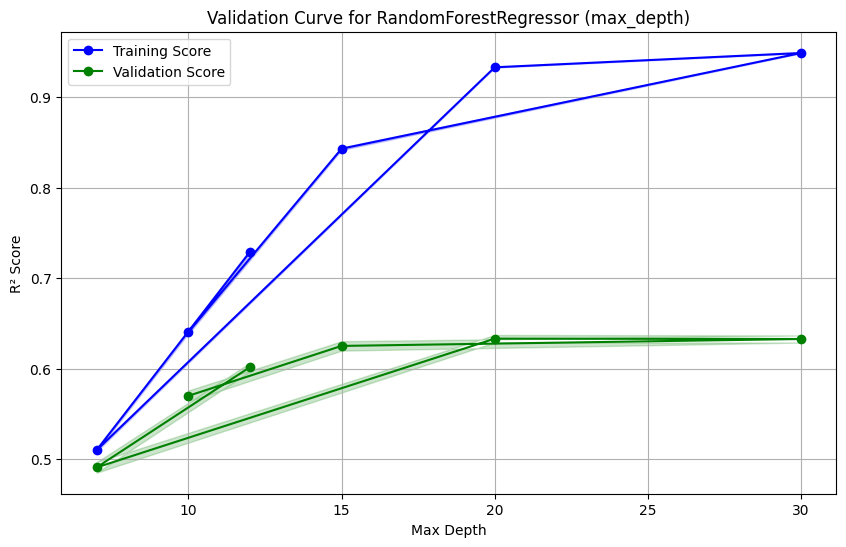

In [ ]:
max_depth = [10,15,30,20,7,12]

# Calculate the validation curve
train_scores, test_scores = validation_curve(
    RandomForestRegressor(),
    X=x_train,
    y=y_train,
    param_name='max_depth',
    param_range=max_depth,
    cv=5,
    scoring='r2',  # 'r2' for regression
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the validation curve
plt.figure(figsize=(10, 6))
plt.title('Validation Curve for RandomForestRegressor (max_depth)')
plt.xlabel('Max Depth')
plt.ylabel('R² Score')

# Plot training scores
plt.plot(max_depth, train_scores_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(max_depth, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='blue')

# Plot validation scores
plt.plot(max_depth, test_scores_mean, label='Validation Score', color='green', marker='o')
plt.fill_between(max_depth, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color='green')

plt.legend(loc='best')
plt.grid()
plt.show()

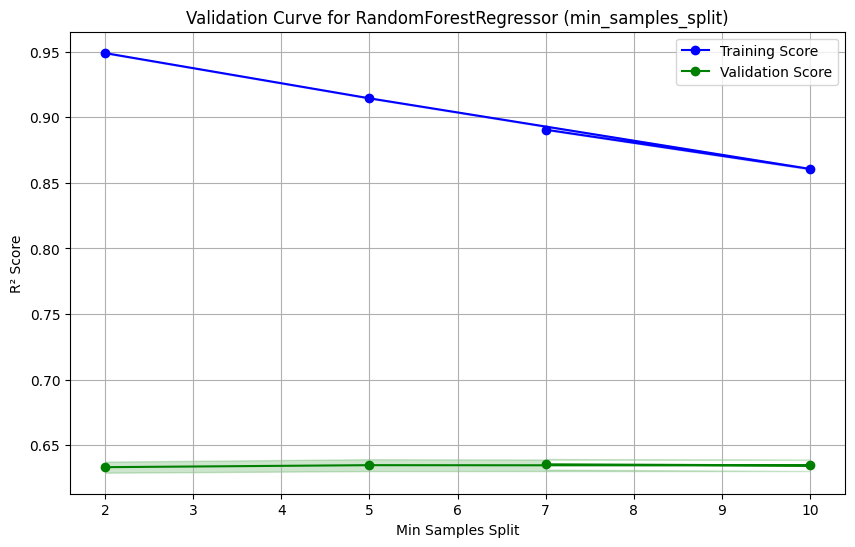

In [ ]:
min_splits = [2, 5, 10 ,7]

# Calculate the validation curve
train_scores, test_scores = validation_curve(
    RandomForestRegressor(),
    X=x_train,
    y=y_train,
    param_name='min_samples_split',
    param_range=min_splits,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the validation curve
plt.figure(figsize=(10, 6))
plt.title('Validation Curve for RandomForestRegressor (min_samples_split)')
plt.xlabel('Min Samples Split')
plt.ylabel('R² Score')

# Plot training scores
plt.plot(min_splits, train_scores_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(min_splits, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='blue')

# Plot validation scores
plt.plot(min_splits, test_scores_mean, label='Validation Score', color='green', marker='o')
plt.fill_between(min_splits, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color='green')

plt.legend(loc='best')
plt.grid()
plt.show()

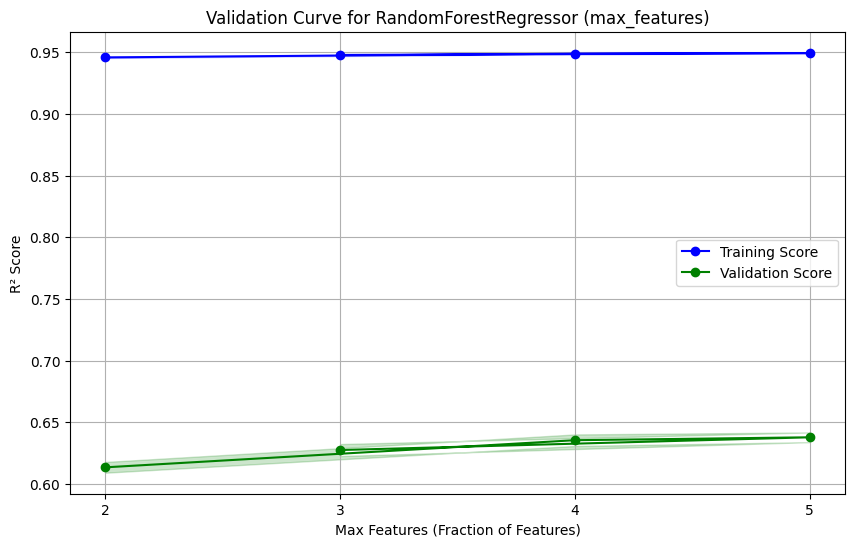

In [ ]:
max_features = [3,5,4,2]
train_scores, test_scores = validation_curve(
    RandomForestRegressor(),
    X=x_train,
    y=y_train,
    param_name='max_features',
    param_range=max_features,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the validation curve
plt.figure(figsize=(10, 6))
plt.title('Validation Curve for RandomForestRegressor (max_features)')
plt.xlabel('Max Features (Fraction of Features)')
plt.ylabel('R² Score')
plt.xticks(max_features)

# Plot training scores
plt.plot(max_features, train_scores_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(max_features, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='blue')

# Plot validation scores
plt.plot(max_features, test_scores_mean, label='Validation Score', color='green', marker='o')
plt.fill_between(max_features, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color='green')

plt.legend(loc='best')
plt.grid()
plt.show()




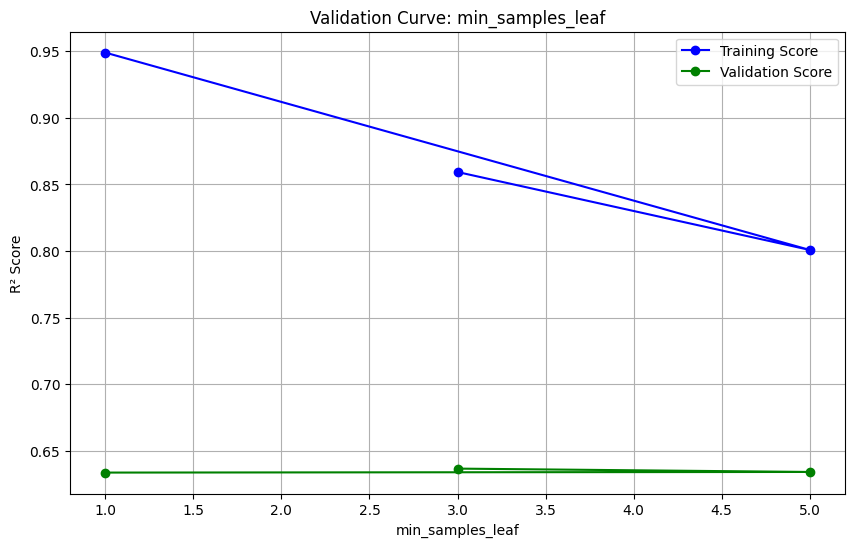

In [ ]:
# Example parameter range
min_samples_leaf_range = [1, 5, 3]

train_scores, valid_scores = validation_curve(
    RandomForestRegressor(),
    X=x_train,
    y=y_train,
    param_name='min_samples_leaf',
    param_range=min_samples_leaf_range,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Calculate mean scores
train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_range, train_mean, label='Training Score', marker='o', color='blue')
plt.plot(min_samples_leaf_range, valid_mean, label='Validation Score', marker='o', color='green')
plt.title('Validation Curve: min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('R² Score')
plt.legend()
plt.grid()
plt.show()

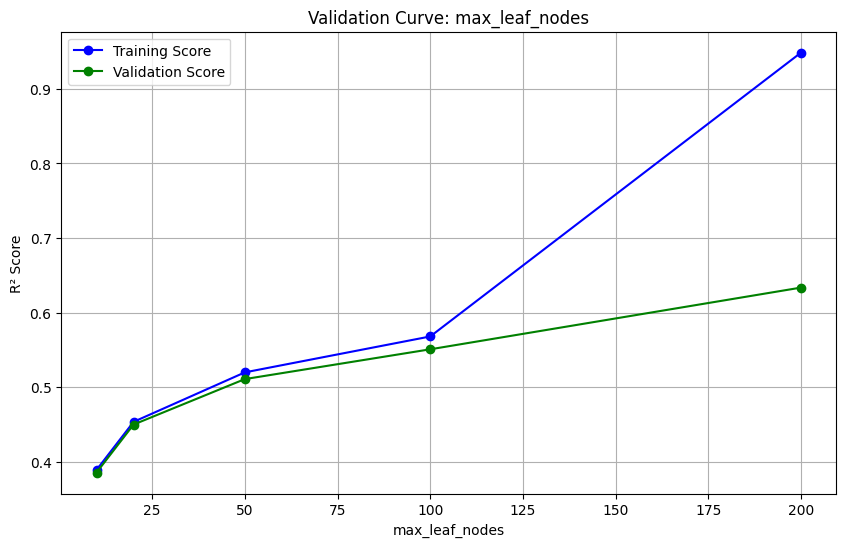

In [ ]:
max_leaf_nodes_range = [10, 20, 50, 100, None]  # None means no limit

train_scores, valid_scores = validation_curve(
    RandomForestRegressor(),
    X=x_train,
    y=y_train,
    param_name='max_leaf_nodes',
    param_range=max_leaf_nodes_range,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot([10, 20, 50, 100, 200], train_mean, label='Training Score', marker='o', color='blue')  # Use 200 instead of None just for plotting scale
plt.plot([10, 20, 50, 100, 200], valid_mean, label='Validation Score', marker='o', color='green')
plt.title('Validation Curve: max_leaf_nodes')
plt.xlabel('max_leaf_nodes')
plt.ylabel('R² Score')
plt.legend()
plt.grid()
plt.show()

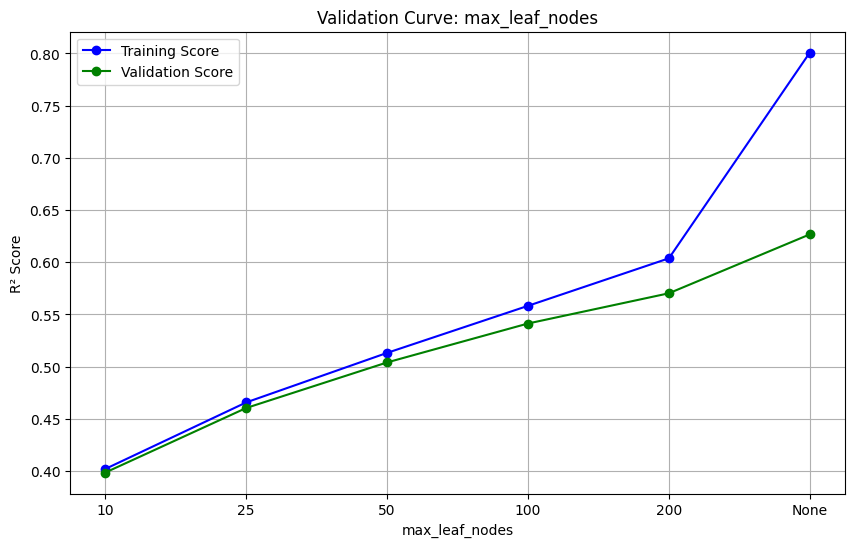

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import validation_curve

# Assuming X_train and y_train are already defined

model1 = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    max_depth=15,
    min_samples_split=7,
    max_features=5,
    min_samples_leaf=1
)

# Define range for max_leaf_nodes
param_range = [10, 25, 50, 100, 200, None]  # None means unlimited leaves

# Calculate validation curve
train_scores, valid_scores = validation_curve(
    model1, x_train, y_train,
    param_name="max_leaf_nodes",
    param_range=param_range,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

# Plotting the validation curve
plt.figure(figsize=(10, 6))
plt.plot([str(p) for p in param_range], train_mean, 'o-', color="blue", label="Training Score")
plt.plot([str(p) for p in param_range], valid_mean, 'o-', color="green", label="Validation Score")
plt.title("Validation Curve: max_leaf_nodes")
plt.xlabel("max_leaf_nodes")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [ ]:
model1 = RandomForestRegressor(n_estimators=500, random_state=42 , n_jobs = -1 , max_depth =15, min_samples_split= 7 , max_features = 5 , min_samples_leaf=1)
model1.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features=5, min_samples_split=7,
                      n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
model1.score(x_test,y_test)

0.6359927471048397

In [ ]:
joblib.dump(model1, './model/final_model.pkl')
joblib.dump(model, './model/raw_model.pkl')
#I work  in google colab since my system work slow


['/content/drive/My Drive/raw_model.pkl']